In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

In [3]:
data = pd.read_csv('uber.csv')

In [4]:
data

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...,...,...
199995,42598914,2012-10-28 10:49:00.00000053,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
199996,16382965,2014-03-14 01:09:00.0000008,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
199997,27804658,2009-06-29 00:42:00.00000078,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
199998,20259894,2015-05-20 14:56:25.0000004,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [6]:
data['pickup_datetime'] = pd.to_datetime(data['pickup_datetime'])

In [11]:
data.keys()

Index(['Unnamed: 0', 'key', 'fare_amount', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count', 'hour', 'day_of_week'],
      dtype='object')

In [7]:
data

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...,...,...
199995,42598914,2012-10-28 10:49:00.00000053,3.0,2012-10-28 10:49:00+00:00,-73.987042,40.739367,-73.986525,40.740297,1
199996,16382965,2014-03-14 01:09:00.0000008,7.5,2014-03-14 01:09:00+00:00,-73.984722,40.736837,-74.006672,40.739620,1
199997,27804658,2009-06-29 00:42:00.00000078,30.9,2009-06-29 00:42:00+00:00,-73.986017,40.756487,-73.858957,40.692588,2
199998,20259894,2015-05-20 14:56:25.0000004,14.5,2015-05-20 14:56:25+00:00,-73.997124,40.725452,-73.983215,40.695415,1


In [8]:
data['hour'] = data['pickup_datetime'].dt.hour
data['day_of_week'] = data['pickup_datetime'].dt.dayofweek

In [18]:
data

,Unnamed: 0,key,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day_of_week
0,24238194,2015-05-07 19:52:06.0000003,7.5,-73.999817,40.738354,-73.999512,40.723217,1,19,3
1,27835199,2009-07-17 20:04:56.0000002,7.7,-73.994355,40.728225,-73.994710,40.750325,1,20,4
2,44984355,2009-08-24 21:45:00.00000061,12.9,-74.005043,40.740770,-73.962565,40.772647,1,21,0
3,25894730,2009-06-26 08:22:21.0000001,5.3,-73.976124,40.790844,-73.965316,40.803349,3,8,4
4,17610152,2014-08-28 17:47:00.000000188,16.0,-73.925023,40.744085,-73.973082,40.761247,5,17,3
...,...,...,...,...,...,...,...,...,...,...
199995,42598914,2012-10-28 10:49:00.00000053,3.0,-73.987042,40.739367,-73.986525,40.740297,1,10,6
199996,16382965,2014-03-14 01:09:00.0000008,7.5,-73.984722,40.736837,-74.006672,40.739620,1,1,4
199997,27804658,2009-06-29 00:42:00.00000078,30.9,-73.986017,40.756487,-73.858957,40.692588,2,0,0
199998,20259894,2015-05-20 14:56:25.0000004,14.5,-73.997124,40.725452,-73.983215,40.695415,1,14,2


In [19]:
data = data.drop(['key'],axis = 1)
data = data.drop(['Unnamed: 0'],axis = 1)

In [21]:
imputer  = SimpleImputer(strategy='mean')
data_imputed = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)
data_imputed

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day_of_week
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1.0,19.0,3.0
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1.0,20.0,4.0
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1.0,21.0,0.0
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3.0,8.0,4.0
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5.0,17.0,3.0
...,...,...,...,...,...,...,...,...
199995,3.0,-73.987042,40.739367,-73.986525,40.740297,1.0,10.0,6.0
199996,7.5,-73.984722,40.736837,-74.006672,40.739620,1.0,1.0,4.0
199997,30.9,-73.986017,40.756487,-73.858957,40.692588,2.0,0.0,0.0
199998,14.5,-73.997124,40.725452,-73.983215,40.695415,1.0,14.0,2.0


In [24]:
X  = data_imputed.drop(columns=['fare_amount'])
Y = data_imputed['fare_amount']

In [25]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [26]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

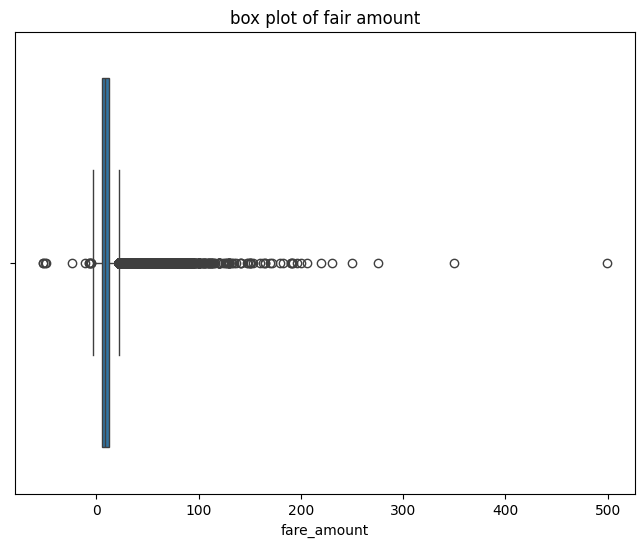

In [28]:
plt.figure(figsize=(8,6))
sns.boxplot(data=data, x='fare_amount')
plt.title("box plot of fair amount")
plt.show()

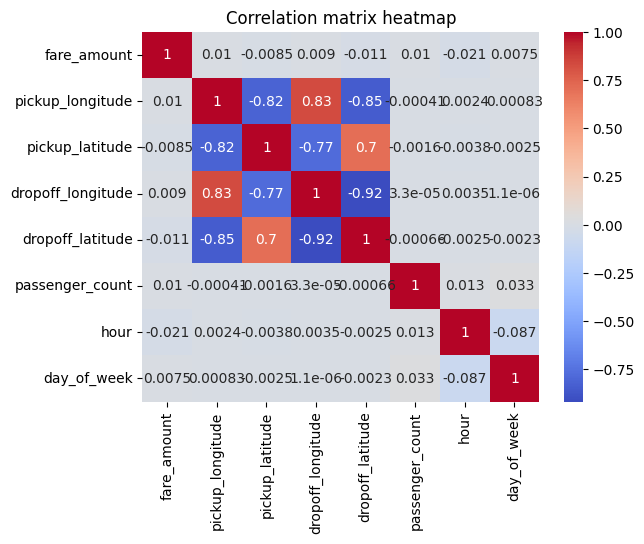

In [31]:
correlation_matrix = data.corr()
plt.plot(figsize=(14,12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation matrix heatmap")
plt.show()

In [32]:
lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
r2_lr = r2_score(y_test, y_pred)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred))
print("R-squared (Linear Regression):", r2_lr)
print("RMSE (Linear Regression):", rmse_lr)

R-squared (Linear Regression): 0.000714497073360465
RMSE (Linear Regression): 10.307523946149495


In [33]:
ls = Lasso(alpha = 1.0)
ls.fit(x_train,y_train)
y_pred = ls.predict(x_test)
r2_ls = r2_score(y_test, y_pred)
rmse_ls = np.sqrt(mean_squared_error(y_test, y_pred))
print("R-squared (Lasso Regression):", r2_ls)
print("RMSE (Lasso Regression):", rmse_ls)

R-squared (Lasso Regression): -1.683808098018602e-05
RMSE (Lasso Regression): 10.311295078556256


In [36]:
rg = Ridge(alpha=1.0)
rg.fit(x_train,y_train)
y_predict = rg.predict(x_test)
r2_rg = r2_score(y_test,y_pred)
rmse_rg = np.sqrt(mean_squared_error(y_test, y_pred))
print("R-squared (Ridge Regression):", r2_rg)
print("RMSE (Ridge Regression):", rmse_rg)

R-squared (Ridge Regression): -1.683808098018602e-05
RMSE (Ridge Regression): 10.311295078556256
